<a href="https://colab.research.google.com/github/dyjs-js/2022_WISET/blob/main/20220802.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 모듈 임포팅

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense, Input

import time

# Keras DNN 최소 코드

# 데이터 준비

1차원 데이터 x와 x**2의 1차원 데이터 y

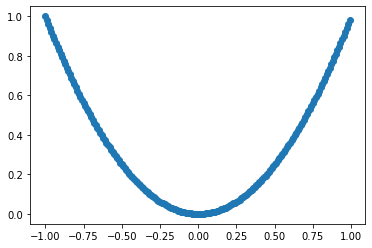

In [ ]:
import numpy as np

x = np.arange(-1,1,0.01)
y= x**2

plt.scatter(x,y)

In [ ]:
print(len(x))
print(x.shape)

200
(200,)


#최소코드
아래 코드는 최소코드

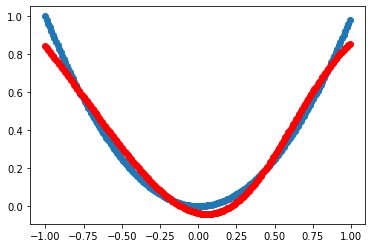

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense, Input

import time


# 모델 정의
model=keras.Sequential()
model.add(Input(1))
model.add(Dense(10,activation='tanh'))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1))

#컴파일 : 모델 + optimizer + loss
model.compile(optimizer="SGD", loss="mse")

#학습
model.fit(x,y, epochs=1000, verbose=0, batch_size=32)
#(입력,출력)

#예측
y_=model.predict(x)

#결과 그래프로 보기
plt.scatter(x,y)
plt.scatter(x,y_,color='r')
plt.show()

## model.evaluate() - 성능 평가하기.

7/7 [==============================] - 0s 2ms/step - loss: 0.0011 - mae: 0.0274
loss= 0.0010734574170783162
mae 0.02742672897875309


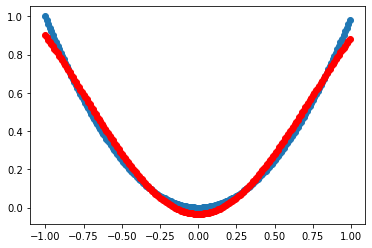

In [ ]:
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense

model=keras.Sequential()
model.add(Input(1))
model.add(Dense(10, activation='tanh'))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1))

#model.compile(optimizer="SGD", loss="mse")
model.compile(optimizer="SGD", loss="mse", metrics=["mae"])

model.fit(x,y, epochs=1000, verbose=0, batch_size=32)


loss, mae = model.evaluate(x,y) #ADD
print("loss=", loss) #ADD
print("mae", mae) # ADD

y_=model.predict(x)

plt.scatter(x,y)
plt.scatter(x,y_,color='r')
plt.show()


## 테스트셋으로 평가하기
데이터를 train과 test으로 나누어 준비한다

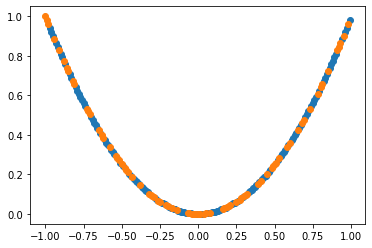

In [ ]:
x=np.arange(-1,1,0.01)
np.random.shuffle(x)
y=x**2

split_index=int(x.shape[0]*0.6)

train_x, test_x = x[:split_index], x[split_index:]
train_y, test_y = y[:split_index], y[split_index:]

#점찍기
plt.scatter(train_x, train_y)
plt.scatter(test_x, test_y)
plt.show()

3/3 [==============================] - 0s 3ms/step - loss: 0.0029 - mae: 0.0435
loss= 0.002857042709365487
mae= 0.04346426576375961


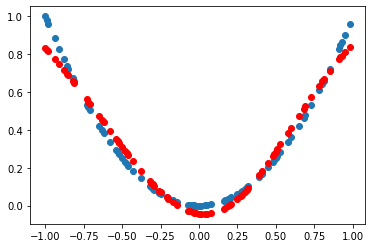

In [ ]:
model=keras.Sequential()
model.add(Input(1))
model.add(Dense(10, activation='tanh'))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1))


model.compile(optimizer="SGD", loss="mse", metrics=["mae"])

model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=32)

loss, mae = model.evaluate(test_x, test_y)
print("loss=", loss)
print("mae=", mae)

y_=model.predict(test_x)

plt.scatter(test_x, test_y)
plt.scatter(test_x,y_,color='r')
plt.show()